Loading Embeded news based on Finbert

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df_news = pd.read_pickle('dataset/News/news_20crypto_embed_finbert.pickle')

Embedding No News sentence for using in timestamp with no news

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch

# Load FinBERT model and tokenizer
model_name = "yiyanghkust/finbert-tone"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Your input news text
text = "No news."

# Tokenize and encode the text
inputs = tokenizer(text, return_tensors='pt', truncation=True, max_length=512)

# Get the model output
with torch.no_grad():
    outputs = model(**inputs)

# Use the [CLS] token embedding as sentence embedding
cls_embedding = outputs.last_hidden_state[:, 0, :]  # Shape: [1, 768]

# Convert to numpy array if needed
embedding_vector = cls_embedding.squeeze().numpy()

print("Embedding shape:", embedding_vector.shape)
# print("Embedding vector:", embedding_vector)
no_news_vector = list(embedding_vector)

config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]

Embedding shape: (768,)


Loading OHLCV of multi stocks

In [ ]:
assets = ['BTCUSDT', 'ETHUSDT', 'XRPUSDT', 'TRXUSDT', 'HBARUSDT', 'XLMUSDT', 'TIAUSDT', 'ARKUSDT', 'SEIUSDT', 'JSTUSDT']
selected_f_asset = ['close', 'volume', 'numberOfTrades', 'return']
selected_f_all = [f"{a}_{f}" for a in assets for f in selected_f_asset]

list_data = []
list_target = []
for symb in assets:
    df = pd.read_pickle(f'content/data_{symb}.pkl')
    df['return'] = 100 * (df['close'].shift(-30)/ df['close'] - 1)
    # df['return'] = 100 * (df['close']/ df['close'].shift(30) - 1)
    df = df[selected_f_asset].rename(columns={x: symb + '_' + x for x in selected_f_asset})
    df[symb+'_target'] = df[symb+'_'+'return'].rolling(30).std().shift(-30)
    list_target.append(symb + '_target')
    list_data.append(df.copy())

data = pd.concat(list_data, axis=1)
df = pd.read_pickle(f'dataset/Crypto_1min/data_{assets[0]}.pkl')
df['return'] = df['close'].pct_change()
data['dateTime'] = df['dateTime']
data['time'] = data['dateTime'].astype(str).copy()
data['return'] = df['close'].pct_change()
data

,BTCUSDT_close,BTCUSDT_volume,BTCUSDT_numberOfTrades,BTCUSDT_return,BTCUSDT_target,ETHUSDT_close,ETHUSDT_volume,ETHUSDT_numberOfTrades,ETHUSDT_return,ETHUSDT_target,...,SEIUSDT_return,SEIUSDT_target,JSTUSDT_close,JSTUSDT_volume,JSTUSDT_numberOfTrades,JSTUSDT_return,JSTUSDT_target,dateTime,time,return
0,91785.18,44.25582000,9784,0.090396,0.305990,2522.98,1236.00450000,7010,-0.212051,0.502812,...,-0.260223,1.011411,0.03331,18269.00000000,13,-0.090063,0.159465,2025-02-25 00:00:00,2025-02-25 00:00:00,NaN
1,91837.75,29.64367000,7048,-0.275225,0.297858,2525.15,609.72690000,4877,-0.827278,0.490293,...,-1.150705,0.993209,0.03332,2854.40000000,4,-0.270108,0.156137,2025-02-25 00:01:00,2025-02-25 00:01:00,0.000573
2,91960.97,70.22032000,6386,-0.408836,0.277100,2529.97,672.80150000,3844,-1.042305,0.465493,...,-0.373692,1.002348,0.03332,89531.30000000,8,-0.300120,0.151207,2025-02-25 00:02:00,2025-02-25 00:02:00,0.001342
3,91862.77,50.83532000,4539,-0.405278,0.253231,2525.85,595.41120000,3903,-1.086763,0.432423,...,-0.037580,1.002886,0.03333,328.80000000,1,-0.420042,0.137613,2025-02-25 00:03:00,2025-02-25 00:03:00,-0.001068
4,91670.09,62.93148000,11779,-0.083004,0.246548,2516.18,1280.56490000,9605,-0.594552,0.432782,...,0.680529,0.999021,0.03329,18030.80000000,13,-0.210273,0.135208,2025-02-25 00:04:00,2025-02-25 00:04:00,-0.002097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131036,109394.14,1.80238000,514,NaN,NaN,2562.98,50.44800000,421,NaN,NaN,...,NaN,NaN,0.03559,1595.40000000,2,NaN,NaN,2025-05-26 23:56:00,2025-05-26 23:56:00,-0.000065
131037,109409.09,5.64688000,698,NaN,NaN,2563.49,77.09600000,508,NaN,NaN,...,NaN,NaN,0.03559,836.40000000,2,NaN,NaN,2025-05-26 23:57:00,2025-05-26 23:57:00,0.000137
131038,109417.56,0.52540000,224,NaN,NaN,2563.20,60.38830000,171,NaN,NaN,...,NaN,NaN,0.03558,1531.20000000,1,NaN,NaN,2025-05-26 23:58:00,2025-05-26 23:58:00,0.000077
131039,109434.79,3.88664000,1349,NaN,NaN,2563.70,99.02600000,711,NaN,NaN,...,NaN,NaN,0.03559,7002.90000000,5,NaN,NaN,2025-05-26 23:59:00,2025-05-26 23:59:00,0.000157


In [ ]:
data = pd.concat(list_data,axis=1)
df = pd.read_pickle('content/data_{}.pkl'.format('BTCUSDT'))
df['return'] = df['close'].pct_change()
data['dateTime'] = df['dateTime']
data['time'] = data['dateTime'].astype(str).copy()
data['return'] = df['close'].pct_change()
data

,BTCUSDT_close,BTCUSDT_volume,BTCUSDT_numberOfTrades,BTCUSDT_return,BTCUSDT_target,ETHUSDT_close,ETHUSDT_volume,ETHUSDT_numberOfTrades,ETHUSDT_return,ETHUSDT_target,...,SEIUSDT_return,SEIUSDT_target,JSTUSDT_close,JSTUSDT_volume,JSTUSDT_numberOfTrades,JSTUSDT_return,JSTUSDT_target,dateTime,time,return
0,91785.18,44.25582000,9784,0.090396,0.305990,2522.98,1236.00450000,7010,-0.212051,0.502812,...,-0.260223,1.011411,0.03331,18269.00000000,13,-0.090063,0.159465,2025-02-25 00:00:00,2025-02-25 00:00:00,NaN
1,91837.75,29.64367000,7048,-0.275225,0.297858,2525.15,609.72690000,4877,-0.827278,0.490293,...,-1.150705,0.993209,0.03332,2854.40000000,4,-0.270108,0.156137,2025-02-25 00:01:00,2025-02-25 00:01:00,0.000573
2,91960.97,70.22032000,6386,-0.408836,0.277100,2529.97,672.80150000,3844,-1.042305,0.465493,...,-0.373692,1.002348,0.03332,89531.30000000,8,-0.300120,0.151207,2025-02-25 00:02:00,2025-02-25 00:02:00,0.001342
3,91862.77,50.83532000,4539,-0.405278,0.253231,2525.85,595.41120000,3903,-1.086763,0.432423,...,-0.037580,1.002886,0.03333,328.80000000,1,-0.420042,0.137613,2025-02-25 00:03:00,2025-02-25 00:03:00,-0.001068
4,91670.09,62.93148000,11779,-0.083004,0.246548,2516.18,1280.56490000,9605,-0.594552,0.432782,...,0.680529,0.999021,0.03329,18030.80000000,13,-0.210273,0.135208,2025-02-25 00:04:00,2025-02-25 00:04:00,-0.002097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131036,109394.14,1.80238000,514,NaN,NaN,2562.98,50.44800000,421,NaN,NaN,...,NaN,NaN,0.03559,1595.40000000,2,NaN,NaN,2025-05-26 23:56:00,2025-05-26 23:56:00,-0.000065
131037,109409.09,5.64688000,698,NaN,NaN,2563.49,77.09600000,508,NaN,NaN,...,NaN,NaN,0.03559,836.40000000,2,NaN,NaN,2025-05-26 23:57:00,2025-05-26 23:57:00,0.000137
131038,109417.56,0.52540000,224,NaN,NaN,2563.20,60.38830000,171,NaN,NaN,...,NaN,NaN,0.03558,1531.20000000,1,NaN,NaN,2025-05-26 23:58:00,2025-05-26 23:58:00,0.000077
131039,109434.79,3.88664000,1349,NaN,NaN,2563.70,99.02600000,711,NaN,NaN,...,NaN,NaN,0.03559,7002.90000000,5,NaN,NaN,2025-05-26 23:59:00,2025-05-26 23:59:00,0.000157


In [ ]:
from torch.utils.data import DataLoader

# Split data based on date
split_date = '2025-05-10'
train_data = data[data['dateTime'] < split_date].copy()
test_data = data[data['dateTime'] >= split_date].copy()

In [ ]:
# data_original = data.copy()
data_original_test = data[data['dateTime'] >= split_date].copy()

In [ ]:
data_original_test = data_original_test[data_original_test['time']>=df_news['time'].min()][data_original_test['time']<=df_news['time'].max()]

In [62]:
data_original_test
selected_return = []
for x in assets:
    data_original_test['return_'+x] = 100*(data_original_test[x+'_close'].pct_change().shift(-1))
    selected_return.append('return_'+x)
df_portfolio = data_original_test[['dateTime']+selected_return].set_index('dateTime').copy()

In [63]:
df_portfolio.shape

(23041, 10)

In [51]:
assets = ['BTCUSDT', 'ETHUSDT', 'XRPUSDT', 'TRXUSDT', 'HBARUSDT', 'XLMUSDT', 'TIAUSDT', 'ARKUSDT', 'SEIUSDT', 'JSTUSDT']

In [ ]:
# Create a new DataFrame with only the asset columns and dateTime as index from test_data
test_data_assets = test_data[assets].copy()
test_data_assets['dateTime'] = test_data['dateTime']
test_data_assets = test_data_assets.set_index('dateTime')
test_data_assets = test_data_assets.dropna()
test_data_assets

,BTCUSDT_return,ETHUSDT_return,XRPUSDT_return,TRXUSDT_return,HBARUSDT_return,XLMUSDT_return,TIAUSDT_return,ARKUSDT_return,SEIUSDT_return,JSTUSDT_return
dateTime,,,,,,,,,,
2025-05-10 00:00:00,-0.062514,0.523234,0.669824,1.190476,0.512846,1.116751,2.622091,0.589035,1.885246,-3.654234
2025-05-10 00:01:00,-0.112655,0.181362,0.383746,0.998464,-0.044287,0.574518,2.198163,0.567408,1.476620,-2.051808
2025-05-10 00:02:00,-0.093887,0.223900,0.349338,1.036468,0.083596,0.269724,1.933159,0.385837,1.147071,-2.031371
2025-05-10 00:03:00,-0.097920,0.088963,0.370497,0.766871,0.019651,0.269542,1.932525,-0.564717,0.816993,-1.605386
2025-05-10 00:04:00,-0.155220,-0.187407,0.246872,0.651591,-0.171804,-0.033636,1.272846,-0.067843,0.530179,-1.170656
...,...,...,...,...,...,...,...,...,...,...
2025-05-26 23:26:00,0.142651,0.257001,0.251703,0.073019,0.503002,0.351247,0.503291,0.274451,0.455166,0.140687
2025-05-26 23:27:00,0.180025,0.296960,0.303859,0.073019,0.568151,0.421793,0.503486,0.274451,0.500911,0.168871
2025-05-26 23:28:00,0.187661,0.269921,0.242992,0.073019,0.530074,0.421644,0.386997,0.249501,0.455166,0.112549


Preparing embedding of news (Handling multi news and no news)

In [ ]:
import numpy as np
df_news['embedding'] = df_news['embedding'].apply(lambda x: np.array(x))

df_grouped = df_news[['time', 'embedding', 'count']].groupby('time')['embedding'].apply(
    lambda x: np.mean(np.stack(x.values), axis=0)
).reset_index()
data_all = data.merge(df_grouped, on='time', how='left')
data_all['embedding'] = data_all['embedding'].apply(
    lambda x: no_news_vector if x is np.nan or x is None else x
)

In [ ]:
list_crypto_first = [x[:-4] for x in assets]
list_crypto_first

['BTCUSDT_re',
 'ETHUSDT_re',
 'XRPUSDT_re',
 'TRXUSDT_re',
 'HBARUSDT_re',
 'XLMUSDT_re',
 'TIAUSDT_re',
 'ARKUSDT_re',
 'SEIUSDT_re',
 'JSTUSDT_re']

In [ ]:
data_all = data_all[data_all['time']>=df_news['time'].min()][data_all['time']<=df_news['time'].max()]

Showing Data

In [ ]:
data_all[selected_f_all]

,BTCUSDT_close,BTCUSDT_volume,BTCUSDT_numberOfTrades,BTCUSDT_return,ETHUSDT_close,ETHUSDT_volume,ETHUSDT_numberOfTrades,ETHUSDT_return,XRPUSDT_close,XRPUSDT_volume,...,ARKUSDT_numberOfTrades,ARKUSDT_return,SEIUSDT_close,SEIUSDT_volume,SEIUSDT_numberOfTrades,SEIUSDT_return,JSTUSDT_close,JSTUSDT_volume,JSTUSDT_numberOfTrades,JSTUSDT_return
0,91785.18,44.25582000,9784,0.090396,2522.98,1236.00450000,7010,-0.212051,2.2986,809446.00000000,...,39,0.117592,0.2690,476336.70000000,733,-0.260223,0.03331,18269.00000000,13,-0.090063
1,91837.75,29.64367000,7048,-0.275225,2525.15,609.72690000,4877,-0.827278,2.3041,517300.00000000,...,6,-0.140878,0.2694,156055.90000000,548,-1.150705,0.03332,2854.40000000,4,-0.270108
2,91960.97,70.22032000,6386,-0.408836,2529.97,672.80150000,3844,-1.042305,2.3147,229433.00000000,...,6,-0.562852,0.2676,287066.90000000,399,-0.373692,0.03332,89531.30000000,8,-0.300120
3,91862.77,50.83532000,4539,-0.405278,2525.85,595.41120000,3903,-1.086763,2.3108,288404.00000000,...,22,-0.633654,0.2661,262063.10000000,400,-0.037580,0.03333,328.80000000,1,-0.420042
4,91670.09,62.93148000,11779,-0.083004,2516.18,1280.56490000,9605,-0.594552,2.2979,668514.00000000,...,10,-0.141276,0.2645,696539.10000000,757,0.680529,0.03329,18030.80000000,13,-0.210273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129596,109030.02,21.06713000,3921,-0.116252,2552.77,225.37620000,1890,-0.240131,2.3434,99206.80000000,...,6,-1.102671,0.2207,15030.10000000,29,-0.362483,0.03616,738.40000000,2,-0.276549
129597,109024.39,5.10152000,1789,-0.280974,2551.81,1078.91390000,2178,-0.376595,2.3432,87402.20000000,...,0,-1.249694,0.2208,384674.80000000,160,-0.588768,0.03616,1093.20000000,3,-0.387168
129598,108995.95,7.48873000,769,-0.216081,2550.74,90.29550000,1032,-0.252476,2.3417,34994.50000000,...,0,-1.151679,0.2206,8649.10000000,23,-0.407978,0.03617,1733.20000000,2,-0.387061
129599,109004.19,6.56241000,1298,-0.182076,2551.22,90.74810000,584,-0.244197,2.3417,31291.00000000,...,1,-1.272638,0.2206,3337.70000000,3,-0.271985,0.03618,33108.70000000,15,-0.386954


Normalizing Data Z-Score

In [ ]:
##Normalization

for x in selected_f_all:
  data_all[x] = data_all[x].fillna(0)
  data_all[x] = data_all[x].astype(float)
  data_all[x] = (data_all[x]-data_all[x].mean())/(data_all[x].std())

Create time index for TimseNet

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from torch.utils.data import Dataset, DataLoader

df_stamp = data_all[['time']].rename(columns={'time':'dateTime'})
df_stamp['dateTime'] = pd.to_datetime(df_stamp['dateTime'])
df_stamp['month'] = df_stamp.dateTime.apply(lambda row: row.month, 1)
df_stamp['day'] = df_stamp.dateTime.apply(lambda row: row.day, 1)
df_stamp['weekday'] = df_stamp.dateTime.apply(lambda row: row.weekday(), 1)
df_stamp['hour'] = df_stamp.dateTime.apply(lambda row: row.hour, 1)
df_stamp['minute'] = df_stamp.dateTime.apply(lambda row: row.minute, 1)
data_stamp = df_stamp.drop(['dateTime'], axis=1)

Dataset Class and Creating DataLoader

In [ ]:
selected_f_all = [x for x in selected_f_all if 'return' not in x]

In [ ]:
data_all

,BTCUSDT_close,BTCUSDT_volume,BTCUSDT_numberOfTrades,BTCUSDT_return,BTCUSDT_target,ETHUSDT_close,ETHUSDT_volume,ETHUSDT_numberOfTrades,ETHUSDT_return,ETHUSDT_target,...,SEIUSDT_target,JSTUSDT_close,JSTUSDT_volume,JSTUSDT_numberOfTrades,JSTUSDT_return,JSTUSDT_target,dateTime,time,return,embedding
0,0.167285,0.761571,2.238912,0.213808,0.305990,1.599140,0.814215,2.091955,-0.348105,0.502812,...,1.011411,0.130534,-0.134389,-0.001972,-0.187779,0.159465,2025-02-25 00:00:00,2025-02-25 00:00:00,NaN,"[-0.34357853420078754, -0.14405876398086548, -..."
1,0.173344,0.324466,1.358806,-0.699443,0.297858,1.605819,0.154783,1.176860,-1.347217,0.490293,...,0.993209,0.133899,-0.175410,-0.104670,-0.550538,0.156137,2025-02-25 00:01:00,2025-02-25 00:01:00,0.000573,"[-0.5324994325637817, -0.6590844392776489, -0...."
2,0.187545,1.538269,1.145856,-1.033180,0.277100,1.620656,0.221197,0.733684,-1.696415,0.465493,...,1.002348,0.133899,0.055249,-0.059026,-0.611007,0.151207,2025-02-25 00:02:00,2025-02-25 00:02:00,0.001342,"[0.7254973, -0.3176596, -1.8444263, 0.7427293,..."
3,0.176227,0.958389,0.551720,-1.024293,0.253231,1.607974,0.139709,0.758997,-1.768614,0.432423,...,1.002886,0.137263,-0.182131,-0.138903,-0.852629,0.137613,2025-02-25 00:03:00,2025-02-25 00:03:00,-0.001068,"[0.7254973, -0.3176596, -1.8444263, 0.7427293,..."
4,0.154021,1.320232,2.880656,-0.219312,0.246548,1.578209,0.861134,3.205256,-0.969277,0.432782,...,0.999021,0.123804,-0.135023,-0.001972,-0.429982,0.135208,2025-02-25 00:04:00,2025-02-25 00:04:00,-0.002097,"[0.7254973, -0.3176596, -1.8444263, 0.7427293,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129596,2.154738,0.067908,0.352924,-0.302360,0.211572,1.690837,-0.249915,-0.104616,-0.393707,0.306938,...,0.499913,1.089495,-0.181041,-0.127492,-0.563515,0.188667,2025-05-25 23:56:00,2025-05-25 23:56:00,0.001304,"[0.7254973, -0.3176596, -1.8444263, 0.7427293,..."
129597,2.154089,-0.409684,-0.332889,-0.713803,0.215223,1.687882,0.648808,0.018941,-0.615321,0.344944,...,0.509625,1.089495,-0.180096,-0.116081,-0.786394,0.206280,2025-05-25 23:57:00,2025-05-25 23:57:00,-0.000052,"[0.7254973, -0.3176596, -1.8444263, 0.7427293,..."
129598,2.150811,-0.338274,-0.660999,-0.551714,0.221724,1.684588,-0.392146,-0.472714,-0.413754,0.379210,...,0.518561,1.092859,-0.178393,-0.127492,-0.786178,0.220906,2025-05-25 23:58:00,2025-05-25 23:58:00,-0.000261,"[0.7254973, -0.3176596, -1.8444263, 0.7427293,..."
129599,2.151761,-0.365984,-0.490832,-0.466774,0.226710,1.686066,-0.391670,-0.664914,-0.400309,0.405194,...,0.520498,1.096224,-0.094899,0.020850,-0.785963,0.235071,2025-05-25 23:59:00,2025-05-25 23:59:00,0.000076,"[0.7254973, -0.3176596, -1.8444263, 0.7427293,..."


In [53]:
import torch
from torch.utils.data import Dataset
import numpy as np
from torch.utils.data import Dataset, DataLoader

class NewsTimeSeriesDataset(Dataset):
    def __init__(self, df, data_stamp, selected_f_all, stock_list, seq_len=30):
        self.df = df.reset_index(drop=True)
        self.data_stamp = data_stamp.reset_index(drop=True)
        self.features = selected_f_all
        self.seq_len = seq_len
        self.stock_list = [x+'_return' for x in stock_list]

    def __len__(self):
        return len(self.df) - self.seq_len

    def __getitem__(self, idx):
        ts_window = self.df.loc[idx:idx + self.seq_len - 1, self.features].values.astype('float32')
        x_mask = self.data_stamp.loc[idx:idx + self.seq_len - 1].values.astype('float32')
        news_window = self.df.loc[idx:idx + self.seq_len - 1, 'embedding'].values
        news_window = np.stack(news_window).astype('float32')
        target = self.df.loc[idx + self.seq_len, self.stock_list].values.astype('float32')  # shape: [19]
        return {
            'timeseries': torch.tensor(ts_window),     # [30, 114]
            'news': torch.tensor(news_window),         # [30, 768]
            'target': torch.tensor(target),
            'time_mask':torch.tensor(x_mask)# [19]
        }

Model Architecture

In [ ]:
import math
import torch.nn as nn
import torch

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=500):
        super().__init__()
        pe = torch.zeros(max_len, d_model)  # [max_len, d_model]
        position = torch.arange(0, max_len, dtype=torch.float32).unsqueeze(1)  # [max_len, 1]
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))  # [d_model/2]

        pe[:, 0::2] = torch.sin(position * div_term)  # even dims
        pe[:, 1::2] = torch.cos(position * div_term)  # odd dims
        pe = pe.unsqueeze(0)  # [1, max_len, d_model]
        self.register_buffer('pe', pe)

    def forward(self, x):
        # x: [batch_size, seq_len, d_model]
        x = x + self.pe[:, :x.size(1), :]
        return x

class TransformerReturnPredictor(nn.Module):
    def __init__(self, feature_dim, d_model=64, nhead=4, num_layers=2, max_len=500):
        super().__init__()
        self.input_proj = nn.Linear(feature_dim, d_model)
        self.pos_encoder = PositionalEncoding(d_model, max_len=max_len)

        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.output_layer = nn.Linear(d_model, 1)

    def forward(self, x):
        # x: [batch_size, seq_len, feature_dim]
        x = self.input_proj(x)             # [batch_size, seq_len, d_model]
        x = self.pos_encoder(x)            # Add positional encoding
        x = self.transformer(x)            # [batch_size, seq_len, d_model]
        x = x[:, -1, :]                    # Use representation of last time step
        return self.output_layer(x).squeeze(-1)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.fft
from transformers import AutoTokenizer, AutoModel
finbert_model_name = "yiyanghkust/finbert-tone"
import torch.nn as nn

class MarketNewsFusionModel(nn.Module):
    def __init__(self, ts_input_dim, news_embed_dim, hidden_dim=64, num_stocks=19,
                 max_len=30, d_model=64, nhead=4, num_layers=2):
        super().__init__()
        self.num_stocks = num_stocks

        self.d_model = d_model
        self.input_proj = nn.Linear(ts_input_dim, self.d_model)
        self.pos_encoder = PositionalEncoding(self.d_model, max_len=max_len)
        encoder_layer = nn.TransformerEncoderLayer(d_model=self.d_model, nhead=nhead, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.ts_out = nn.Linear(128, hidden_dim)

        # 2. News LSTM
        self.news_proj = nn.Linear(news_embed_dim, 64)
        self.news_lstm = nn.LSTM(input_size=64, hidden_size=hidden_dim, batch_first=True)

        # 3. Stock-specific regression heads (1 per stock)
        self.stock_heads = nn.Sequential(
                nn.Linear(self.d_model+hidden_dim, 64),
                nn.ReLU(),
                nn.Linear(64, num_stocks)
            )

    def forward(self, ts_input, x_mark_enc, news_input):  # [B, 30, F], [B, 30, E]

                # Transformer on OHLCV
        x = self.input_proj(ts_input)           # [B, T, d_model]
        x = self.pos_encoder(x)
        x = self.transformer(x)                  # [B, T, d_model]
        ts_emb = x[:, -1, :].squeeze(1)                   # [B, d_model]


        news_proj = self.news_proj(news_input)         # [B, 30, 64]
        _, (hn, _) = self.news_lstm(news_proj)        # hn: [1, B, 64]
        news_emb = hn[-1]                              # [B, 64]

        fused = torch.cat([ts_emb, news_emb], dim=1)   # [B, 128]

        outputs = self.stock_heads(fused).squeeze(-1)
        return outputs             # [B, 19]


seq_len = 30

# model = TimesNet.Model(args).float()
# model = Model_TimesNet(configs).float()

Loading Model and dataloader

In [54]:
from torch.utils.data import DataLoader

# Example setup
# selected_f_all = list of feature columns (e.g., 6 × 19 = 114)
# stock_list = ['AAPL', 'GOOG', ..., 'TSLA'] → 19 stock target columns
# df = your dataframe with those columns and 'embedding' column


# Split data based on date
split_date = '2025-05-10'
train_data = data_all[data_all['dateTime'] < split_date].copy()
test_data = data_all[data_all['dateTime'] >= split_date].copy()


# Prepare data_stamp for the split data
df_stamp_train = train_data[['time']].rename(columns={'time':'dateTime'})
df_stamp_train['dateTime'] = pd.to_datetime(df_stamp_train['dateTime'])
df_stamp_train['month'] = df_stamp_train.dateTime.apply(lambda row: row.month, 1)
df_stamp_train['day'] = df_stamp_train.dateTime.apply(lambda row: row.day, 1)
df_stamp_train['weekday'] = df_stamp_train.dateTime.apply(lambda row: row.weekday(), 1)
df_stamp_train['hour'] = df_stamp_train.dateTime.apply(lambda row: row.hour, 1)
df_stamp_train['minute'] = df_stamp_train.dateTime.apply(lambda row: row.minute, 1)
data_stamp_train = df_stamp_train.drop(['dateTime'], axis=1)


df_stamp_test = test_data[['time']].rename(columns={'time':'dateTime'})
df_stamp_test['dateTime'] = pd.to_datetime(df_stamp_test['dateTime'])
df_stamp_test['month'] = df_stamp_test.dateTime.apply(lambda row: row.month, 1)
df_stamp_test['day'] = df_stamp_test.dateTime.apply(lambda row: row.day, 1)
df_stamp_test['weekday'] = df_stamp_test.dateTime.apply(lambda row: row.weekday(), 1)
df_stamp_test['hour'] = df_stamp_test.dateTime.apply(lambda row: row.hour, 1)
df_stamp_test['minute'] = df_stamp_test.dateTime.apply(lambda row: row.minute, 1)
data_stamp_test = df_stamp_test.drop(['dateTime'], axis=1)


seq_len=30

train_dataset = NewsTimeSeriesDataset(train_data, data_stamp_train, selected_f_all, assets, seq_len=30)
val_dataset = NewsTimeSeriesDataset(test_data, data_stamp_test, selected_f_all, assets, seq_len=30) # Using test_data as validation for now

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)



model = MarketNewsFusionModel(ts_input_dim=len(selected_f_all),
 news_embed_dim=len(data_all['embedding'].iloc[0]),
 hidden_dim=64,
 num_stocks=len(assets),
 max_len=30,
 d_model=64, nhead=4, num_layers=2)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
loss_fn = nn.MSELoss()

In [ ]:
train_data

,BTCUSDT_close,BTCUSDT_volume,BTCUSDT_numberOfTrades,BTCUSDT_return,BTCUSDT_target,ETHUSDT_close,ETHUSDT_volume,ETHUSDT_numberOfTrades,ETHUSDT_return,ETHUSDT_target,...,SEIUSDT_target,JSTUSDT_close,JSTUSDT_volume,JSTUSDT_numberOfTrades,JSTUSDT_return,JSTUSDT_target,dateTime,time,return,embedding
0,0.167285,0.761571,2.238912,0.213808,0.305990,1.599140,0.814215,2.091955,-0.348105,0.502812,...,1.011411,0.130534,-0.134389,-0.001972,-0.187779,0.159465,2025-02-25 00:00:00,2025-02-25 00:00:00,NaN,"[-0.34357853420078754, -0.14405876398086548, -..."
1,0.173344,0.324466,1.358806,-0.699443,0.297858,1.605819,0.154783,1.176860,-1.347217,0.490293,...,0.993209,0.133899,-0.175410,-0.104670,-0.550538,0.156137,2025-02-25 00:01:00,2025-02-25 00:01:00,5.727504e-04,"[-0.5324994325637817, -0.6590844392776489, -0...."
2,0.187545,1.538269,1.145856,-1.033180,0.277100,1.620656,0.221197,0.733684,-1.696415,0.465493,...,1.002348,0.133899,0.055249,-0.059026,-0.611007,0.151207,2025-02-25 00:02:00,2025-02-25 00:02:00,1.341714e-03,"[0.7254973, -0.3176596, -1.8444263, 0.7427293,..."
3,0.176227,0.958389,0.551720,-1.024293,0.253231,1.607974,0.139709,0.758997,-1.768614,0.432423,...,1.002886,0.137263,-0.182131,-0.138903,-0.852629,0.137613,2025-02-25 00:03:00,2025-02-25 00:03:00,-1.067844e-03,"[0.7254973, -0.3176596, -1.8444263, 0.7427293,..."
4,0.154021,1.320232,2.880656,-0.219312,0.246548,1.578209,0.861134,3.205256,-0.969277,0.432782,...,0.999021,0.123804,-0.135023,-0.001972,-0.429982,0.135208,2025-02-25 00:04:00,2025-02-25 00:04:00,-2.097476e-03,"[0.7254973, -0.3176596, -1.8444263, 0.7427293,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106555,1.456555,-0.540843,-0.863012,0.019526,0.057715,1.043017,-0.436144,-0.774313,1.923693,0.901754,...,1.534782,1.722072,-0.039770,-0.116081,1.264866,0.937347,2025-05-09 23:55:00,2025-05-09 23:55:00,-9.711378e-08,"[0.7254973, -0.3176596, -1.8444263, 0.7427293,..."
106556,1.456555,-0.510129,-0.829557,0.012201,0.053489,1.054313,-0.265234,-0.291239,1.509489,0.905202,...,1.566708,1.708613,1.437801,0.796794,1.160161,0.892225,2025-05-09 23:56:00,2025-05-09 23:56:00,0.000000e+00,"[0.7254973, -0.3176596, -1.8444263, 0.7427293,..."
106557,1.456555,-0.398741,-0.802215,-0.021056,0.049558,1.052220,-0.354661,-0.565381,1.490540,0.885935,...,1.566285,1.701884,-0.094416,-0.059026,1.797371,0.810042,2025-05-09 23:57:00,2025-05-09 23:57:00,0.000000e+00,"[0.7254973, -0.3176596, -1.8444263, 0.7427293,..."
106558,1.456556,-0.459524,-0.828592,-0.036823,0.045560,1.053298,-0.377758,-0.686364,1.408621,0.862724,...,1.556034,1.708613,-0.034751,-0.013383,1.425270,0.726605,2025-05-09 23:58:00,2025-05-09 23:58:00,9.711379e-08,"[0.7254973, -0.3176596, -1.8444263, 0.7427293,..."


In [ ]:
test_data.iloc[30:]

,BTCUSDT_close,BTCUSDT_volume,BTCUSDT_numberOfTrades,BTCUSDT_return,BTCUSDT_target,ETHUSDT_close,ETHUSDT_volume,ETHUSDT_numberOfTrades,ETHUSDT_return,ETHUSDT_target,...,SEIUSDT_target,JSTUSDT_close,JSTUSDT_volume,JSTUSDT_numberOfTrades,JSTUSDT_return,JSTUSDT_target,dateTime,time,return,embedding
106590,1.450667,0.161966,0.159919,-0.145926,0.085138,1.089158,1.259008,1.881307,-1.854848,0.633104,...,1.362738,1.786003,1.026046,0.123549,-3.115780,0.631353,2025-05-10 00:30:00,2025-05-10 00:30:00,-0.000152,"[0.3973887860774994, 0.09131991863250732, 0.30..."
106591,1.445950,-0.337699,-0.411378,-0.041774,0.084040,1.059392,1.290539,2.750068,-1.143744,0.629648,...,1.354844,1.772544,-0.092780,-0.059026,-2.433183,0.615324,2025-05-10 00:31:00,2025-05-10 00:31:00,-0.000398,"[0.7254973, -0.3176596, -1.8444263, 0.7427293,..."
106592,1.449369,-0.169987,-0.294932,-0.113756,0.081216,1.066841,0.190666,1.526080,-1.194398,0.619764,...,1.347263,1.742261,2.001961,0.751150,-2.015855,0.606701,2025-05-10 00:32:00,2025-05-10 00:32:00,0.000288,"[0.7254973, -0.3176596, -1.8444263, 0.7427293,..."
106593,1.451946,-0.392044,-0.184275,-0.155132,0.075608,1.070966,-0.080025,0.883412,-1.273144,0.603521,...,1.336123,1.708613,2.205413,0.831026,-1.968122,0.602441,2025-05-10 00:33:00,2025-05-10 00:33:00,0.000217,"[0.7254973, -0.3176596, -1.8444263, 0.7427293,..."
106594,1.452000,-0.380957,-0.328386,-0.035522,0.073172,1.062871,-0.111127,0.759426,-1.000764,0.597855,...,1.334129,1.705248,3.463275,0.956547,-1.703460,0.603848,2025-05-10 00:34:00,2025-05-10 00:34:00,0.000005,"[0.7254973, -0.3176596, -1.8444263, 0.7427293,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129596,2.154738,0.067908,0.352924,-0.302360,0.211572,1.690837,-0.249915,-0.104616,-0.393707,0.306938,...,0.499913,1.089495,-0.181041,-0.127492,-0.563515,0.188667,2025-05-25 23:56:00,2025-05-25 23:56:00,0.001304,"[0.7254973, -0.3176596, -1.8444263, 0.7427293,..."
129597,2.154089,-0.409684,-0.332889,-0.713803,0.215223,1.687882,0.648808,0.018941,-0.615321,0.344944,...,0.509625,1.089495,-0.180096,-0.116081,-0.786394,0.206280,2025-05-25 23:57:00,2025-05-25 23:57:00,-0.000052,"[0.7254973, -0.3176596, -1.8444263, 0.7427293,..."
129598,2.150811,-0.338274,-0.660999,-0.551714,0.221724,1.684588,-0.392146,-0.472714,-0.413754,0.379210,...,0.518561,1.092859,-0.178393,-0.127492,-0.786178,0.220906,2025-05-25 23:58:00,2025-05-25 23:58:00,-0.000261,"[0.7254973, -0.3176596, -1.8444263, 0.7427293,..."
129599,2.151761,-0.365984,-0.490832,-0.466774,0.226710,1.686066,-0.391670,-0.664914,-0.400309,0.405194,...,0.520498,1.096224,-0.094899,0.020850,-0.785963,0.235071,2025-05-25 23:59:00,2025-05-25 23:59:00,0.000076,"[0.7254973, -0.3176596, -1.8444263, 0.7427293,..."


Testing model pipeline

In [56]:
# One training step
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

for batch in train_loader:
    ts_input = batch['timeseries'].cuda()
    news_input = batch['news'].cuda()
    target = batch['target'].cuda()
    time_mask = batch['time_mask'].cuda()

    output = model(ts_input, time_mask, news_input)  # [B, 19]
    loss = loss_fn(output, target)
    print(loss)
    break

tensor(0.7812, device='cuda:0', grad_fn=<MseLossBackward0>)


Training model

In [64]:
df_portfolio = df_portfolio.iloc[30:]

In [65]:
df_portfolio.shape

(23011, 10)

In [66]:
prediction_array.shape

(23011, 10)

In [ ]:
import importlib.util
import sys

mvo_path = "mvo.py"

spec = importlib.util.spec_from_file_location("mvo", mvo_path)
mvo = importlib.util.module_from_spec(spec)
sys.modules["mvo"] = mvo
spec.loader.exec_module(mvo)

prediction_array = np.vstack(all_preds)
mvo.run_mvo_and_plot(prediction_array, df_portfolio, assets=list_crypto_first, eta=0)


🔁 Epoch 1/3


Training:   0%|          | 1/3330 [00:01<1:06:00,  1.19s/it]

  Step 0/3330 - Batch Loss: 0.7672 - Avg Loss: 0.7672


Training:   3%|▎         | 101/3330 [00:46<12:28,  4.31it/s]

  Step 100/3330 - Batch Loss: 0.5741 - Avg Loss: 0.9895


Training:   6%|▌         | 201/3330 [01:09<11:21,  4.59it/s]

  Step 200/3330 - Batch Loss: 0.8362 - Avg Loss: 1.0415


Training:   9%|▉         | 301/3330 [01:32<10:41,  4.72it/s]

  Step 300/3330 - Batch Loss: 1.0731 - Avg Loss: 1.0393


Training:  12%|█▏        | 401/3330 [02:00<10:32,  4.63it/s]

  Step 400/3330 - Batch Loss: 0.8189 - Avg Loss: 1.0349


Training:  15%|█▌        | 501/3330 [02:30<09:56,  4.75it/s]

  Step 500/3330 - Batch Loss: 1.4126 - Avg Loss: 1.0267


Training:  18%|█▊        | 601/3330 [02:53<10:48,  4.21it/s]

  Step 600/3330 - Batch Loss: 0.6282 - Avg Loss: 1.0260


Training:  21%|██        | 701/3330 [03:15<09:19,  4.70it/s]

  Step 700/3330 - Batch Loss: 0.7244 - Avg Loss: 1.0442


Training:  24%|██▍       | 801/3330 [03:39<08:57,  4.71it/s]

  Step 800/3330 - Batch Loss: 1.7230 - Avg Loss: 1.0536


Training:  27%|██▋       | 901/3330 [04:02<08:32,  4.74it/s]

  Step 900/3330 - Batch Loss: 0.5435 - Avg Loss: 1.0505


Training:  30%|███       | 1001/3330 [04:26<11:11,  3.47it/s]

  Step 1000/3330 - Batch Loss: 1.4411 - Avg Loss: 1.0446


Training:  33%|███▎      | 1101/3330 [04:49<07:58,  4.66it/s]

  Step 1100/3330 - Batch Loss: 0.7258 - Avg Loss: 1.0437


Training:  36%|███▌      | 1201/3330 [05:13<07:36,  4.66it/s]

  Step 1200/3330 - Batch Loss: 0.8593 - Avg Loss: 1.0431


Training:  39%|███▉      | 1301/3330 [05:36<07:13,  4.68it/s]

  Step 1300/3330 - Batch Loss: 1.0833 - Avg Loss: 1.0432


Training:  42%|████▏     | 1401/3330 [05:59<08:15,  3.89it/s]

  Step 1400/3330 - Batch Loss: 1.0027 - Avg Loss: 1.0418


Training:  45%|████▌     | 1501/3330 [06:22<06:33,  4.65it/s]

  Step 1500/3330 - Batch Loss: 0.7451 - Avg Loss: 1.0441


Training:  48%|████▊     | 1601/3330 [06:45<06:13,  4.63it/s]

  Step 1600/3330 - Batch Loss: 0.7646 - Avg Loss: 1.0376


Training:  51%|█████     | 1701/3330 [07:08<07:53,  3.44it/s]

  Step 1700/3330 - Batch Loss: 0.9516 - Avg Loss: 1.0386


Training:  54%|█████▍    | 1801/3330 [07:30<05:26,  4.69it/s]

  Step 1800/3330 - Batch Loss: 0.8421 - Avg Loss: 1.0343


Training:  57%|█████▋    | 1901/3330 [07:55<05:04,  4.70it/s]

  Step 1900/3330 - Batch Loss: 0.8786 - Avg Loss: 1.0339


Training:  60%|██████    | 2001/3330 [08:18<06:21,  3.48it/s]

  Step 2000/3330 - Batch Loss: 0.8907 - Avg Loss: 1.0368


Training:  63%|██████▎   | 2101/3330 [08:40<04:19,  4.74it/s]

  Step 2100/3330 - Batch Loss: 1.8647 - Avg Loss: 1.0357


Training:  66%|██████▌   | 2201/3330 [09:03<04:00,  4.69it/s]

  Step 2200/3330 - Batch Loss: 0.8969 - Avg Loss: 1.0399


Training:  69%|██████▉   | 2301/3330 [09:26<03:54,  4.39it/s]

  Step 2300/3330 - Batch Loss: 1.2000 - Avg Loss: 1.0374


Training:  72%|███████▏  | 2401/3330 [09:48<03:14,  4.77it/s]

  Step 2400/3330 - Batch Loss: 0.6150 - Avg Loss: 1.0387


Training:  75%|███████▌  | 2501/3330 [10:11<02:56,  4.69it/s]

  Step 2500/3330 - Batch Loss: 1.0092 - Avg Loss: 1.0355


Training:  78%|███████▊  | 2601/3330 [10:36<02:38,  4.61it/s]

  Step 2600/3330 - Batch Loss: 0.6573 - Avg Loss: 1.0368


Training:  81%|████████  | 2701/3330 [10:58<03:00,  3.49it/s]

  Step 2700/3330 - Batch Loss: 1.6857 - Avg Loss: 1.0367


Training:  84%|████████▍ | 2801/3330 [11:20<01:51,  4.74it/s]

  Step 2800/3330 - Batch Loss: 0.6560 - Avg Loss: 1.0367


Training:  87%|████████▋ | 2901/3330 [11:43<01:30,  4.74it/s]

  Step 2900/3330 - Batch Loss: 1.8632 - Avg Loss: 1.0365


Training:  90%|█████████ | 3001/3330 [12:06<01:28,  3.73it/s]

  Step 3000/3330 - Batch Loss: 0.7333 - Avg Loss: 1.0352


Training:  93%|█████████▎| 3101/3330 [12:28<00:48,  4.76it/s]

  Step 3100/3330 - Batch Loss: 0.6525 - Avg Loss: 1.0337


Training:  96%|█████████▌| 3201/3330 [12:51<00:27,  4.61it/s]

  Step 3200/3330 - Batch Loss: 0.7576 - Avg Loss: 1.0308


Training:  99%|█████████▉| 3301/3330 [13:16<00:08,  3.30it/s]

  Step 3300/3330 - Batch Loss: 0.7733 - Avg Loss: 1.0310


Validating: 100%|██████████| 720/720 [01:10<00:00, 10.18it/s]


📊 Epoch 1 Summary:
  Train Loss: 1.0326
  Val Loss: 0.8191
  R² per stock: ['BTCUSDT_re , -0.045', 'ETHUSDT_re , -0.037', 'XRPUSDT_re , -0.146', 'TRXUSDT_re , -0.048', 'HBARUSDT_re , -0.070', 'XLMUSDT_re , -0.079', 'TIAUSDT_re , -0.016', 'ARKUSDT_re , -0.072', 'SEIUSDT_re , -0.024', 'JSTUSDT_re , -0.041']


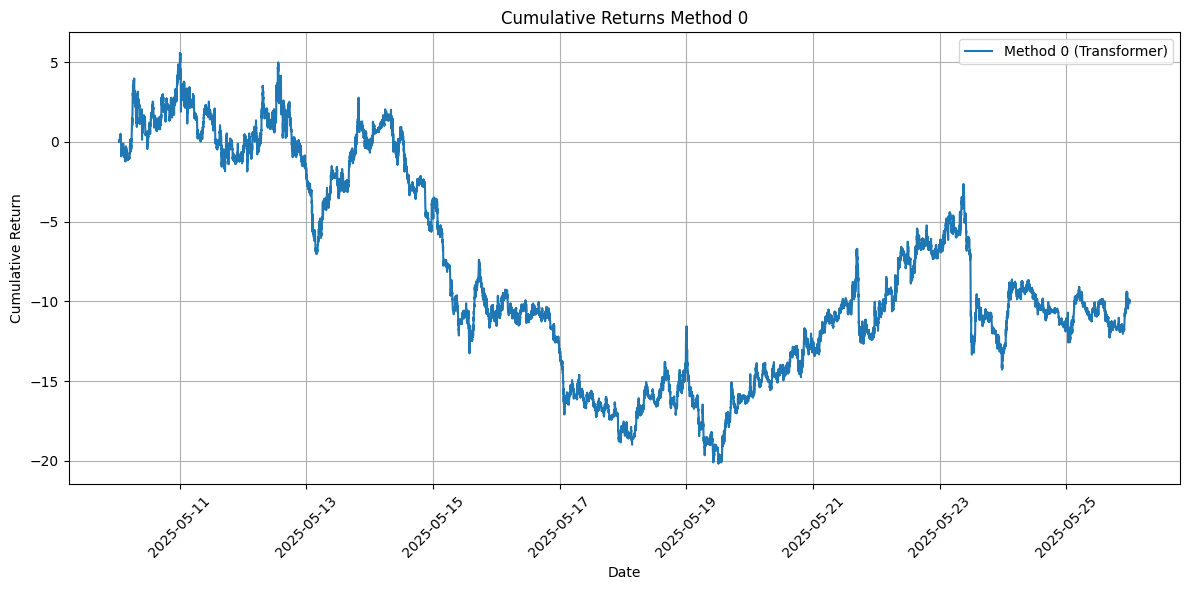

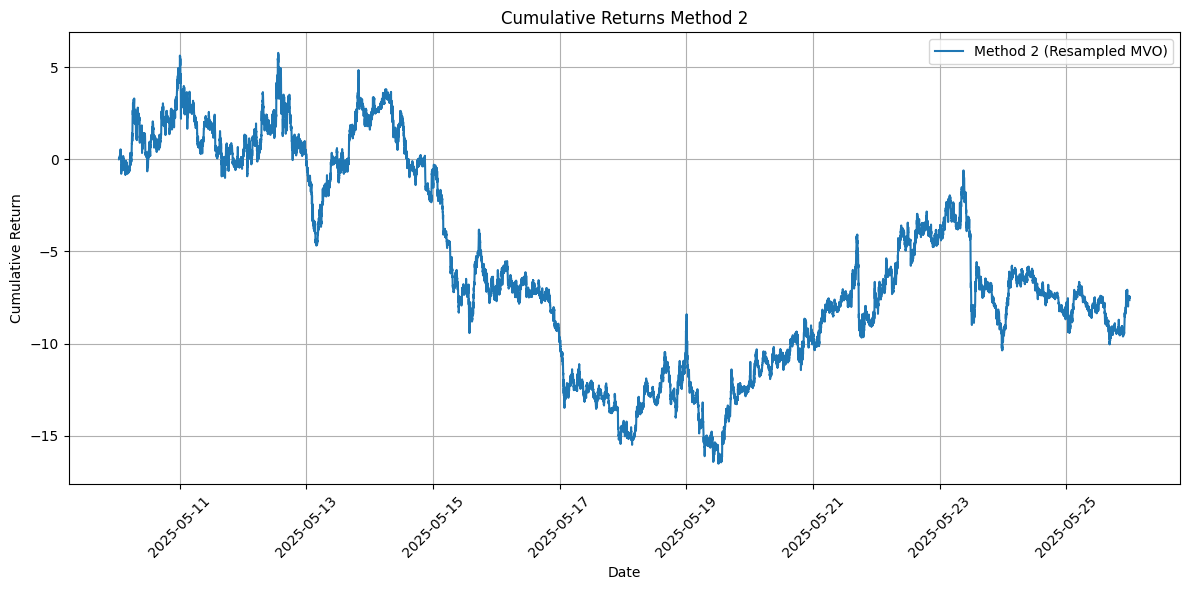

✅ Best model saved.

🔁 Epoch 2/3


Training:   0%|          | 2/3330 [00:00<11:52,  4.67it/s]

  Step 0/3330 - Batch Loss: 0.7481 - Avg Loss: 0.7481


Training:   3%|▎         | 101/3330 [00:23<11:24,  4.72it/s]

  Step 100/3330 - Batch Loss: 0.8343 - Avg Loss: 1.0149


Training:   6%|▌         | 201/3330 [00:45<14:01,  3.72it/s]

  Step 200/3330 - Batch Loss: 1.0265 - Avg Loss: 1.0285


Training:   9%|▉         | 301/3330 [01:08<10:53,  4.63it/s]

  Step 300/3330 - Batch Loss: 0.4528 - Avg Loss: 0.9831


Training:  12%|█▏        | 401/3330 [01:31<10:23,  4.69it/s]

  Step 400/3330 - Batch Loss: 0.8234 - Avg Loss: 1.0070


Training:  15%|█▌        | 501/3330 [01:54<14:06,  3.34it/s]

  Step 500/3330 - Batch Loss: 1.1316 - Avg Loss: 1.0141


Training:  18%|█▊        | 601/3330 [02:18<09:49,  4.63it/s]

  Step 600/3330 - Batch Loss: 0.8041 - Avg Loss: 1.0287


Training:  21%|██        | 701/3330 [02:41<09:08,  4.79it/s]

  Step 700/3330 - Batch Loss: 0.6468 - Avg Loss: 1.0251


Training:  24%|██▍       | 801/3330 [03:04<09:02,  4.66it/s]

  Step 800/3330 - Batch Loss: 0.6864 - Avg Loss: 1.0224


Training:  27%|██▋       | 901/3330 [03:26<09:23,  4.31it/s]

  Step 900/3330 - Batch Loss: 0.8897 - Avg Loss: 1.0189


Training:  30%|███       | 1001/3330 [03:49<08:01,  4.83it/s]

  Step 1000/3330 - Batch Loss: 0.5090 - Avg Loss: 1.0227


Training:  33%|███▎      | 1101/3330 [04:12<07:45,  4.79it/s]

  Step 1100/3330 - Batch Loss: 0.7132 - Avg Loss: 1.0247


Training:  36%|███▌      | 1201/3330 [04:34<09:45,  3.63it/s]

  Step 1200/3330 - Batch Loss: 0.4986 - Avg Loss: 1.0209


Training:  39%|███▉      | 1302/3330 [04:57<06:58,  4.85it/s]

  Step 1300/3330 - Batch Loss: 0.8564 - Avg Loss: 1.0133


Training:  42%|████▏     | 1401/3330 [05:21<06:43,  4.78it/s]

  Step 1400/3330 - Batch Loss: 0.5489 - Avg Loss: 1.0116


Training:  45%|████▌     | 1501/3330 [05:44<08:35,  3.55it/s]

  Step 1500/3330 - Batch Loss: 1.8726 - Avg Loss: 1.0092


Training:  48%|████▊     | 1601/3330 [06:06<06:08,  4.69it/s]

  Step 1600/3330 - Batch Loss: 0.6962 - Avg Loss: 1.0051


Training:  51%|█████     | 1701/3330 [06:30<05:45,  4.72it/s]

  Step 1700/3330 - Batch Loss: 0.5883 - Avg Loss: 1.0105


Training:  54%|█████▍    | 1801/3330 [06:53<06:31,  3.91it/s]

  Step 1800/3330 - Batch Loss: 0.9612 - Avg Loss: 1.0173


Training:  57%|█████▋    | 1901/3330 [07:14<04:59,  4.77it/s]

  Step 1900/3330 - Batch Loss: 0.8508 - Avg Loss: 1.0165


Training:  60%|██████    | 2002/3330 [07:37<04:35,  4.82it/s]

  Step 2000/3330 - Batch Loss: 0.6848 - Avg Loss: 1.0180


Training:  63%|██████▎   | 2101/3330 [08:01<04:23,  4.67it/s]

  Step 2100/3330 - Batch Loss: 0.8237 - Avg Loss: 1.0145


Training:  66%|██████▌   | 2201/3330 [08:24<05:03,  3.72it/s]

  Step 2200/3330 - Batch Loss: 0.5881 - Avg Loss: 1.0110


Training:  69%|██████▉   | 2301/3330 [08:47<03:30,  4.88it/s]

  Step 2300/3330 - Batch Loss: 0.9658 - Avg Loss: 1.0124


Training:  72%|███████▏  | 2401/3330 [09:10<03:14,  4.78it/s]

  Step 2400/3330 - Batch Loss: 3.9523 - Avg Loss: 1.0112


Training:  75%|███████▌  | 2501/3330 [09:32<03:55,  3.53it/s]

  Step 2500/3330 - Batch Loss: 0.6756 - Avg Loss: 1.0100


Training:  78%|███████▊  | 2601/3330 [09:55<02:29,  4.88it/s]

  Step 2600/3330 - Batch Loss: 1.2374 - Avg Loss: 1.0028


Training:  81%|████████  | 2701/3330 [10:18<02:08,  4.88it/s]

  Step 2700/3330 - Batch Loss: 0.3399 - Avg Loss: 1.0034


Training:  84%|████████▍ | 2801/3330 [10:41<02:35,  3.39it/s]

  Step 2800/3330 - Batch Loss: 0.8314 - Avg Loss: 1.0023


Training:  87%|████████▋ | 2901/3330 [11:04<01:30,  4.74it/s]

  Step 2900/3330 - Batch Loss: 0.8365 - Avg Loss: 1.0001


Training:  90%|█████████ | 3001/3330 [11:27<01:08,  4.82it/s]

  Step 3000/3330 - Batch Loss: 0.4113 - Avg Loss: 1.0015


Training:  93%|█████████▎| 3101/3330 [11:50<00:48,  4.69it/s]

  Step 3100/3330 - Batch Loss: 0.5611 - Avg Loss: 0.9979


Training:  96%|█████████▌| 3201/3330 [12:12<00:31,  4.11it/s]

  Step 3200/3330 - Batch Loss: 1.2842 - Avg Loss: 0.9961


Training:  99%|█████████▉| 3301/3330 [12:35<00:06,  4.69it/s]

  Step 3300/3330 - Batch Loss: 1.4349 - Avg Loss: 0.9934


Validating: 100%|██████████| 720/720 [01:11<00:00, 10.03it/s]


📊 Epoch 2 Summary:
  Train Loss: 0.9926
  Val Loss: 0.7989
  R² per stock: ['BTCUSDT_re , -0.027', 'ETHUSDT_re , -0.051', 'XRPUSDT_re , -0.034', 'TRXUSDT_re , -0.014', 'HBARUSDT_re , -0.026', 'XLMUSDT_re , -0.012', 'TIAUSDT_re , 0.002', 'ARKUSDT_re , -0.092', 'SEIUSDT_re , -0.035', 'JSTUSDT_re , -0.010']


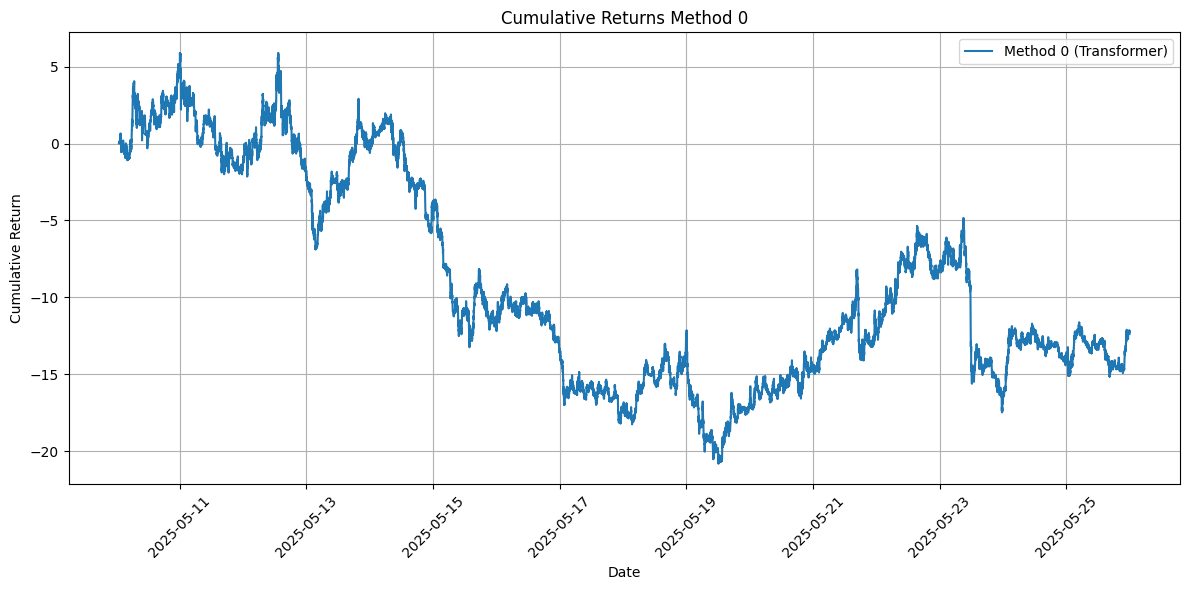

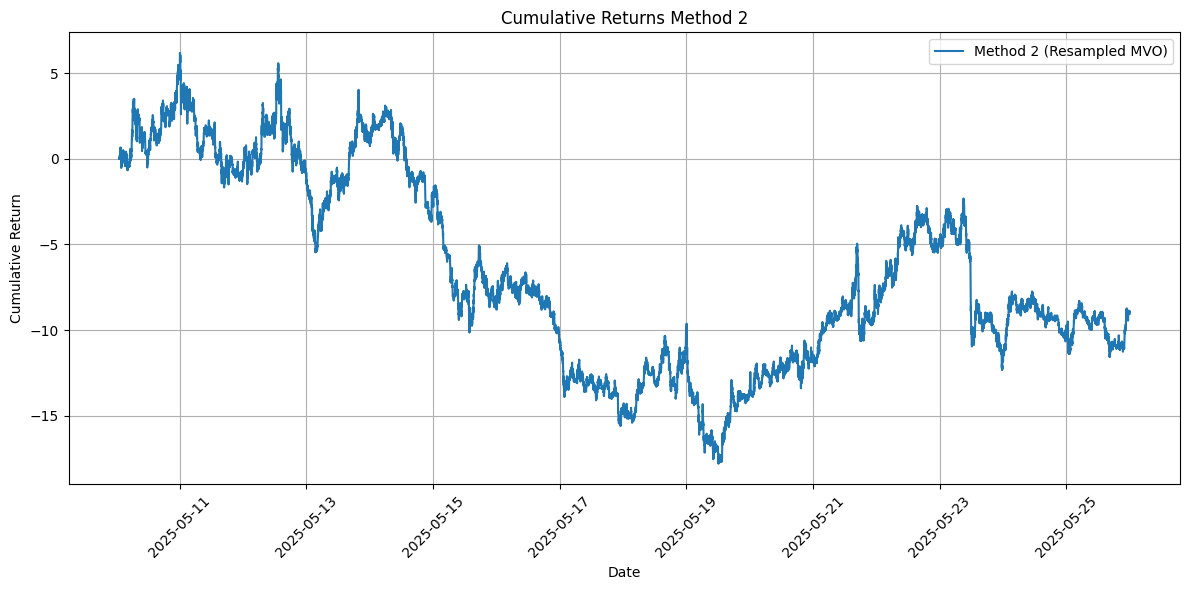

✅ Best model saved.

🔁 Epoch 3/3


Training:   0%|          | 1/3330 [00:00<16:59,  3.27it/s]

  Step 0/3330 - Batch Loss: 0.7835 - Avg Loss: 0.7835


Training:   3%|▎         | 101/3330 [00:23<11:39,  4.62it/s]

  Step 100/3330 - Batch Loss: 0.7640 - Avg Loss: 1.0172


Training:   6%|▌         | 201/3330 [00:47<11:03,  4.71it/s]

  Step 200/3330 - Batch Loss: 0.8712 - Avg Loss: 0.9660


Training:   9%|▉         | 301/3330 [01:10<13:25,  3.76it/s]

  Step 300/3330 - Batch Loss: 0.6617 - Avg Loss: 0.9496


Training:  12%|█▏        | 401/3330 [01:33<11:09,  4.38it/s]

  Step 400/3330 - Batch Loss: 0.6101 - Avg Loss: 0.9611


Training:  15%|█▌        | 501/3330 [01:56<10:01,  4.70it/s]

  Step 500/3330 - Batch Loss: 1.1757 - Avg Loss: 0.9781


Training:  18%|█▊        | 601/3330 [02:19<13:28,  3.37it/s]

  Step 600/3330 - Batch Loss: 1.8343 - Avg Loss: 0.9727


Training:  21%|██        | 701/3330 [02:42<09:25,  4.65it/s]

  Step 700/3330 - Batch Loss: 4.5904 - Avg Loss: 0.9629


Training:  24%|██▍       | 802/3330 [03:06<08:43,  4.83it/s]

  Step 800/3330 - Batch Loss: 1.2697 - Avg Loss: 0.9661


Training:  27%|██▋       | 901/3330 [03:30<08:43,  4.64it/s]

  Step 900/3330 - Batch Loss: 0.7927 - Avg Loss: 0.9666


Training:  30%|███       | 1001/3330 [03:53<11:09,  3.48it/s]

  Step 1000/3330 - Batch Loss: 0.5630 - Avg Loss: 0.9593


Training:  33%|███▎      | 1101/3330 [04:16<08:10,  4.55it/s]

  Step 1100/3330 - Batch Loss: 1.1948 - Avg Loss: 0.9639


Training:  36%|███▌      | 1201/3330 [04:39<07:30,  4.73it/s]

  Step 1200/3330 - Batch Loss: 0.8430 - Avg Loss: 0.9600


Training:  39%|███▉      | 1301/3330 [05:03<10:07,  3.34it/s]

  Step 1300/3330 - Batch Loss: 0.6788 - Avg Loss: 0.9599


Training:  42%|████▏     | 1401/3330 [05:25<06:46,  4.74it/s]

  Step 1400/3330 - Batch Loss: 1.8458 - Avg Loss: 0.9608


Training:  45%|████▌     | 1501/3330 [05:48<06:26,  4.73it/s]

  Step 1500/3330 - Batch Loss: 0.6038 - Avg Loss: 0.9560


Training:  48%|████▊     | 1601/3330 [06:12<06:45,  4.27it/s]

  Step 1600/3330 - Batch Loss: 0.5359 - Avg Loss: 0.9525


Training:  51%|█████     | 1701/3330 [06:35<07:27,  3.64it/s]

  Step 1700/3330 - Batch Loss: 0.9451 - Avg Loss: 0.9499


Training:  54%|█████▍    | 1801/3330 [06:58<05:22,  4.75it/s]

  Step 1800/3330 - Batch Loss: 0.8068 - Avg Loss: 0.9501


Training:  57%|█████▋    | 1901/3330 [07:21<05:14,  4.54it/s]

  Step 1900/3330 - Batch Loss: 1.3006 - Avg Loss: 0.9469


Training:  60%|██████    | 2001/3330 [07:45<06:28,  3.42it/s]

  Step 2000/3330 - Batch Loss: 0.6963 - Avg Loss: 0.9477


Training:  63%|██████▎   | 2101/3330 [08:07<04:20,  4.71it/s]

  Step 2100/3330 - Batch Loss: 0.4484 - Avg Loss: 0.9481


Training:  66%|██████▌   | 2201/3330 [08:30<03:58,  4.73it/s]

  Step 2200/3330 - Batch Loss: 4.4483 - Avg Loss: 0.9500


Training:  69%|██████▉   | 2301/3330 [08:53<04:23,  3.91it/s]

  Step 2300/3330 - Batch Loss: 1.1419 - Avg Loss: 0.9493


Training:  72%|███████▏  | 2401/3330 [09:17<03:19,  4.67it/s]

  Step 2400/3330 - Batch Loss: 0.7824 - Avg Loss: 0.9487


Training:  75%|███████▌  | 2501/3330 [09:40<02:57,  4.66it/s]

  Step 2500/3330 - Batch Loss: 0.7319 - Avg Loss: 0.9472


Training:  78%|███████▊  | 2601/3330 [10:03<02:43,  4.45it/s]

  Step 2600/3330 - Batch Loss: 1.4361 - Avg Loss: 0.9445


Training:  81%|████████  | 2701/3330 [10:26<02:17,  4.57it/s]

  Step 2700/3330 - Batch Loss: 1.3115 - Avg Loss: 0.9443


Training:  84%|████████▍ | 2801/3330 [10:49<01:52,  4.71it/s]

  Step 2800/3330 - Batch Loss: 1.4187 - Avg Loss: 0.9455


Training:  87%|████████▋ | 2901/3330 [11:12<01:30,  4.75it/s]

  Step 2900/3330 - Batch Loss: 1.4307 - Avg Loss: 0.9451


Training:  90%|█████████ | 3001/3330 [11:35<01:32,  3.55it/s]

  Step 3000/3330 - Batch Loss: 1.9921 - Avg Loss: 0.9462


Training:  93%|█████████▎| 3101/3330 [11:59<01:07,  3.41it/s]

  Step 3100/3330 - Batch Loss: 0.5742 - Avg Loss: 0.9445


Training:  96%|█████████▌| 3201/3330 [12:22<00:26,  4.85it/s]

  Step 3200/3330 - Batch Loss: 1.0275 - Avg Loss: 0.9449


Training:  99%|█████████▉| 3301/3330 [12:45<00:06,  4.47it/s]

  Step 3300/3330 - Batch Loss: 1.0973 - Avg Loss: 0.9424


Validating: 100%|██████████| 720/720 [01:11<00:00, 10.06it/s]


📊 Epoch 3 Summary:
  Train Loss: 0.9437
  Val Loss: 0.8075
  R² per stock: ['BTCUSDT_re , -0.022', 'ETHUSDT_re , -0.048', 'XRPUSDT_re , -0.063', 'TRXUSDT_re , -0.036', 'HBARUSDT_re , -0.033', 'XLMUSDT_re , -0.036', 'TIAUSDT_re , -0.009', 'ARKUSDT_re , -0.037', 'SEIUSDT_re , -0.030', 'JSTUSDT_re , -0.059']


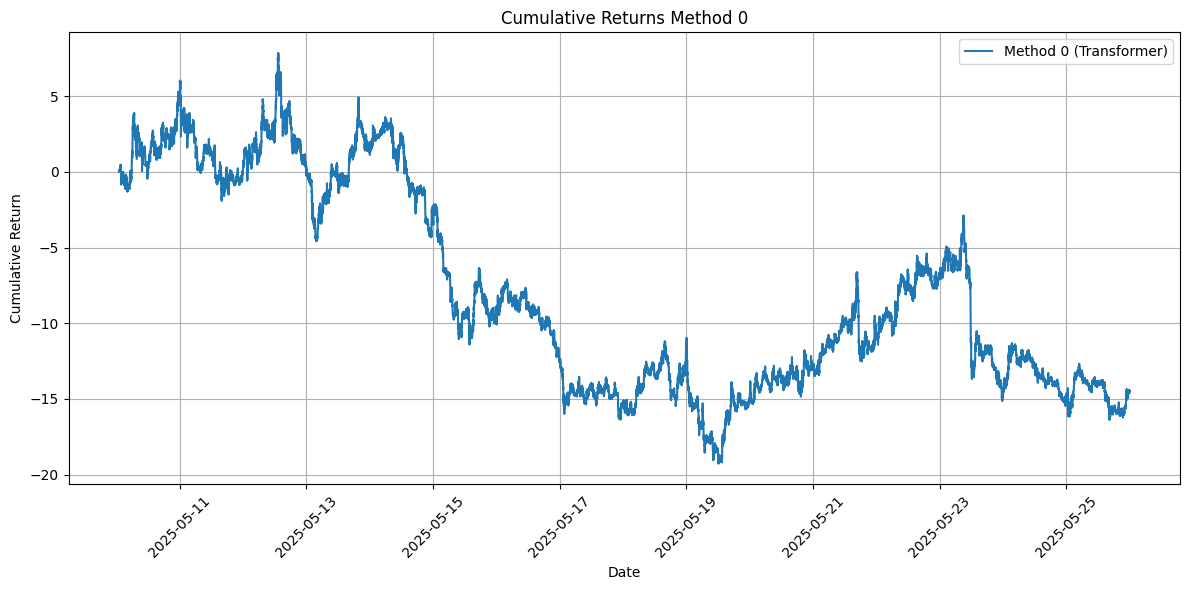

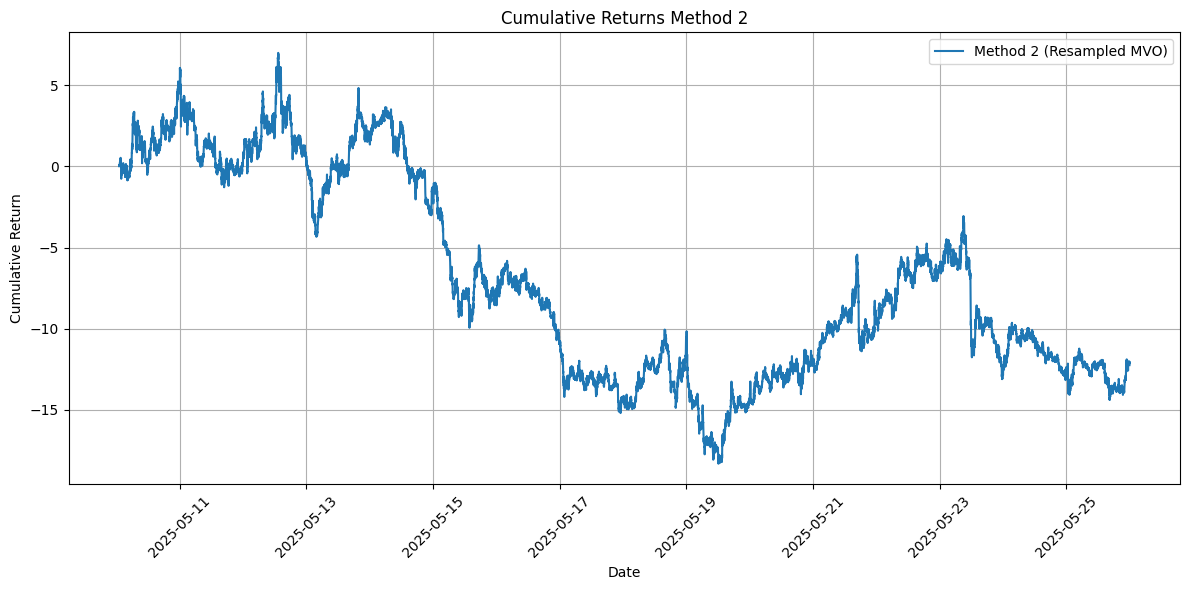

⏳ Early stopping patience: 1/5


In [68]:
from sklearn.metrics import r2_score
from tqdm import tqdm
import torch
import numpy as np
import os
from mvo import run_mvo_and_plot


def compute_r2_per_stock(y_true, y_pred):
    r2s = []
    for i in range(y_true.shape[1]):
        r2s.append(r2_score(y_true[:, i], y_pred[:, i]))
    return r2s

num_epochs=3
patience=5
save_path='best_model.pth'
device='cuda'

best_val_loss = float('inf')
patience_counter = 0
model.to(device)

for epoch in range(1, num_epochs + 1):
    model.train()
    total_train_loss = 0

    print(f"\n🔁 Epoch {epoch}/{num_epochs}")
    for step, batch in enumerate(tqdm(train_loader, desc="Training")):
        ts_input = batch['timeseries'].to(device)
        news_input = batch['news'].to(device)
        target = batch['target'].to(device)
        time_mask = batch['time_mask'].to(device)

        output = model(ts_input, time_mask, news_input)
        loss = loss_fn(output, target)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

        # Step-wise print every 100 steps
        if step % 100 == 0:
            avg_loss = total_train_loss / (step + 1)
            print(f"  Step {step}/{len(train_loader)} - Batch Loss: {loss.item():.4f} - Avg Loss: {avg_loss:.4f}")

    # Validation phase
    model.eval()
    total_val_loss = 0
    all_preds, all_targets = [], []

    with torch.no_grad():
        for batch in tqdm(val_loader, desc="Validating"):
            ts_input = batch['timeseries'].to(device)
            news_input = batch['news'].to(device)
            target = batch['target'].to(device)
            time_mask = batch['time_mask'].to(device)

            output = model(ts_input, time_mask, news_input)
            loss = loss_fn(output, target)

            total_val_loss += loss.item()
            all_preds.append(output.cpu().numpy())
            all_targets.append(target.cpu().numpy())

    avg_train_loss = total_train_loss / len(train_loader)
    avg_val_loss = total_val_loss / len(val_loader)

    y_pred = np.concatenate(all_preds, axis=0)
    y_true = np.concatenate(all_targets, axis=0)
    r2_scores = compute_r2_per_stock(y_true, y_pred)

    print(f"📊 Epoch {epoch} Summary:")
    print(f"  Train Loss: {avg_train_loss:.4f}")
    print(f"  Val Loss: {avg_val_loss:.4f}")
    print("  R² per stock:", ["{} , {:.3f}".format(list_crypto_first[r], r2_scores[r]) for r in range(len(r2_scores))])
    prediction_array = np.vstack(all_preds)
    run_mvo_and_plot(prediction_array, df_portfolio, list_crypto_first, eta=0.4)

    if epoch % 5 == 0:
        np.save(f"y_pred_epoch_{epoch}.npy", y_pred)
        np.save(f"y_true_epoch_{epoch}.npy", y_true)

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0
        torch.save(model.state_dict(), save_path)
        print("✅ Best model saved.")
    else:
        patience_counter += 1
        print(f"⏳ Early stopping patience: {patience_counter}/{patience}")

    if patience_counter >= patience:
        print("⛔ Early stopping triggered.")
        break